In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Quais as quantidades de cada tipo de vinho?

In [32]:
# grop by e count
#df.groupby('quality').count()
ax = df['quality'].value_counts().reset_index()
ax.columns = ['qualidade', 'quantidade']
ax

,qualidade,quantidade
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


## Quantos desvios padrões o vinho de 0.5 de açucar residual está da média?

In [33]:
media = df['residual sugar'].mean()
desvio = df['residual sugar'].std()
print("Media da amostra: ", media)
print("Desvio padrão da amostra: ", desvio)
print("Quantidade de desvios padrões: ", abs((0.5 - media)/desvio))

Media da amostra:  2.53880550343965
Desvio padrão da amostra:  1.4099280595072805
Quantidade de desvios padrões:  1.4460351290207953


## Qual o intervalo de confiança dos vinhos de qualidade 5 em relação à quantidade de açucar residual?

In [34]:
df_vinho5 = df[df['quality'] == 5]
media_vinho5 = df_vinho5['residual sugar'].mean()
desvio_vinho5 = df_vinho5['residual sugar'].std()
print("Media da amostra: ", media_vinho5)
print("Desvio padrão da amostra: ",desvio_vinho5)
limite_inferior =  media_vinho5 - 1.96  * (desvio_vinho5/np.sqrt(len(df_vinho5)))
limite_superior =  media_vinho5 + 1.96  * (desvio_vinho5/np.sqrt(len(df_vinho5)))
print("Intervalo de confiança: ", limite_inferior, limite_superior)

Media da amostra:  2.528854625550661
Desvio padrão da amostra:  1.359752630297107
Intervalo de confiança:  2.426727190893679 2.630982060207643


## Plote a distribuição do teor alcólico dos vinhos de acordo com a qualidade

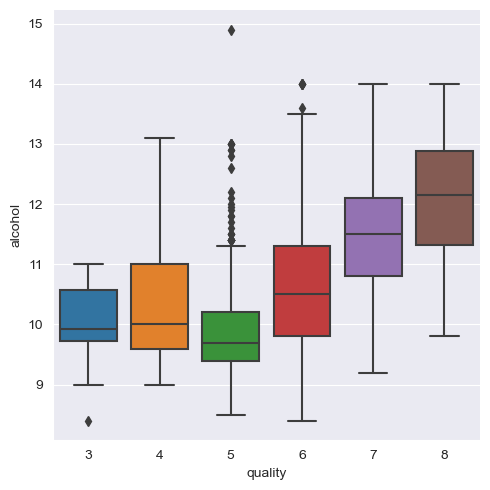

In [56]:
sns.catplot(x="quality", y="alcohol", kind="box", data=df)


## Houve um erro durante a produção, sendo que vinhos com a açucar residual maior que 10 foram afetados. Mostre quais foram os vinhos afetados

In [65]:
nome_10 = df[df['residual sugar'] > 10]
nome_10

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


### Mostre uma lista com o id dos vinhos afetados

In [68]:
ids_vinho10 = nome_10.index
ids_vinho10

Int64Index([33, 324, 325, 480, 1235, 1244, 1434, 1435, 1474, 1476, 1574], dtype='int64')

## Adicione um coluna para determinar o valor do vinho, considerando que o valor será:

Valor = Qualidade * teor alcóolico

In [70]:
new_column = df['quality'] * df['alcohol']
df['valor do vinho'] = new_column
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,valor do vinho
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,47.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,49.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,49.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,58.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,52.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,67.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,66.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,51.0


## Quais são os vinhos com o maior preço de cada qualidade?

In [81]:
df[df.groupby(['quality'])['valor do vinho'].transform(max) == df['valor do vinho']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,valor do vinho
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,52.4
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,84.0
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,84.0
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6,84.0
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,112.0
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,74.5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,98.0
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,33.0
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8,112.0
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,84.0


## Um vinho com o 'citric acid' igual a 0.45 tem a maior probabilidade de pertencer a qual qualidade?

In [107]:
import scipy.stats as st

def qualidade(p):
    if p < 0.05:
        print("Rejeitar H0\n\n")
    else:
        print("Aceitar H1\n\n")


#Qualidades
qualidade_3 = df[df['quality'] == 3]
qualidade_4 = df[df['quality'] == 4]
qualidade_5 = df[df['quality'] == 5]
qualidade_6 = df[df['quality'] == 6]
qualidade_7 = df[df['quality'] == 7]
qualidade_8 = df[df['quality'] == 8]

#Média das qualidades
media_3 = df[df['quality'] == 3]['citric acid'].mean()
media_4 = df[df['quality'] == 4]['citric acid'].mean()
media_5 = df[df['quality'] == 5]['citric acid'].mean()
media_6 = df[df['quality'] == 6]['citric acid'].mean()
media_7 = df[df['quality'] == 7]['citric acid'].mean()
media_8 = df[df['quality'] == 8]['citric acid'].mean()

#Erro padrão
erro_3 = (df [df['quality'] == 3]['citric acid'].std())/np.sqrt(len(df[df['quality'] == 3]))
z_score_3 = abs(0.45 - media_3)/erro_3
valor_p_3 = 2*st.norm.sf(abs(z_score_3))
print("Erro padrão para qualidade 3: ", erro_3)
print("Z-score: ", z_score_3)
print ("Probabilidade de ser da qualidade 3: ", valor_p_3)
qualidade(valor_p_3)

erro_4 = (df [df['quality'] == 4]['citric acid'].std())/np.sqrt(len(df[df['quality'] == 4]))
z_score_4 = abs(0.45 - media_4)/erro_4
valor_p_4 = 2*st.norm.sf(abs(z_score_4))
print("Erro padrão para qualidade 4: ", erro_4)
print("Z-score: ", z_score_4)
print ("Probabilidade de ser da qualidade 4: ", valor_p_4)
qualidade(valor_p_4)

erro_5 = (df [df['quality'] == 5]['citric acid'].std())/np.sqrt(len(df[df['quality'] == 5]))
z_score_5 = abs(0.45 - media_5)/erro_5
valor_p_5 = 2*st.norm.sf(abs(z_score_5))
print("Erro padrão para qualidade 5: ", erro_5)
print("Z-score: ", z_score_5)
print ("Probabilidade de ser da qualidade 5: ", valor_p_5)
qualidade(valor_p_5)


erro_6 = (df [df['quality'] == 6]['citric acid'].std())/np.sqrt(len(df[df['quality'] == 6]))
z_score_6 = abs(0.45 - media_6)/erro_6
valor_p_6 = 2*st.norm.sf(abs(z_score_6))
print("Erro padrão para qualidade 6: ", erro_6)
print("Z-score: ", z_score_6)
print ("Probabilidade de ser da qualidade 6: ", valor_p_6)
qualidade(valor_p_6)

erro_7 = (df [df['quality'] == 7]['citric acid'].std())/np.sqrt(len(df[df['quality'] == 7]))
z_score_7 = abs(0.45 - media_7)/erro_7
valor_p_7 = 2*st.norm.sf(abs(z_score_7))
print("Erro padrão para qualidade 7: ", erro_7)
print("Z-score: ", z_score_7)
print ("Probabilidade de ser da qualidade 7: ", valor_p_7)
qualidade(valor_p_7)

erro_8 = (df [df['quality'] == 8]['citric acid'].std())/np.sqrt(len(df[df['quality'] == 8]))
z_score_8 = abs(0.45 - media_8)/erro_8
valor_p_8 = 2*st.norm.sf(abs(z_score_8))
print("Erro padrão para qualidade 8: ", erro_8)
print("Z-score: ", z_score_8)
print ("Probabilidade de ser da qualidade 8: ", valor_p_8)
qualidade(valor_p_8)








Erro padrão para qualidade 3:  0.07926677880563977
Z-score:  3.519759528567463
Probabilidade de ser da qualidade 3:  0.00043193822145575747
Rejeitar H0


Erro padrão para qualidade 4:  0.02761364427138512
Z-score:  9.989592604755346
Probabilidade de ser da qualidade 4:  1.692760065055133e-23
Rejeitar H0


Erro padrão para qualidade 5:  0.006897716539610617
Z-score:  29.910513511885245
Probabilidade de ser da qualidade 5:  1.43641855027428e-196
Rejeitar H0


Erro padrão para qualidade 6:  0.007724416488374369
Z-score:  22.80761904209783
Probabilidade de ser da qualidade 6:  3.852580859939881e-115
Rejeitar H0


Erro padrão para qualidade 7:  0.013782933706796188
Z-score:  5.42875139609213
Probabilidade de ser da qualidade 7:  5.674966720379526e-08
Rejeitar H0


Erro padrão para qualidade 8:  0.04702863047379867
Z-score:  1.2521922985126697
Probabilidade de ser da qualidade 8:  0.2104998016395846
Aceitar H1




##  Fazer um gráfico de barra da média de "alcohol" por "quality"

<Axes: xlabel='quality'>

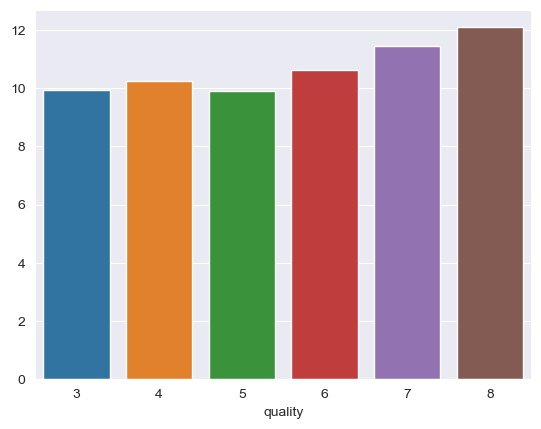

In [112]:
media_alcohol = df.groupby('quality')['alcohol'].mean()
sns.barplot(x=media_alcohol.index, y=media_alcohol.values)